<a href="https://colab.research.google.com/github/MSClaus/MSClaus-gameOfThrones_Analise/blob/main/Game_of_Thrones__Episodios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EXPLORAÇÃO DE DADOS SOBRE A SÉRIE GAME OF THRONES** 
#####**Autor:** Matheus Souza Claus


# **1. INTRODUÇÃO**
Neste projeto explorei um conjunto de dados sobre a série de grande sucesso, Game of Thrones.

### Motivação:
- Praticar e desenvolver habilidades e conceitos de análises exploratória em um conjunto de dados.
- Sou fã da série e admirador das obras de George R. R. Martin que serviram de base para a realização da mesma.
- Soma-se a isso o fato de querer entender algumas particularidades e curiosidades a respeito da série.


### Sobre a Base:
* Composta por dois arquivos:
  * game_of_thrones_episodes: Dados sobre cada episódio extraídos da lista de episódios de Game of Thrones no Wikipedia. Compõe as colunas:
      * Season
      * Episode number in season
      * Title
      * Original air date
      * Average IMDb rating
  * game_of_thrones_imdb: Classificações do IMDb e descrição resumida dos episódios. Compõe as colunas:
      * Season
      * Episode number in season
      * Episode number in series
      * Title of the episode
      * Director
      * Writers
      * Original air date
      * US viewers on original air date

In [ ]:
from google.colab import files 

episodios = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/game_of_thrones_episodes.csv')
imdb = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/game_of_thrones_imdb.csv')

#**2. IMPORTANDO MÓDULOS**


In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# **3. IMPORTANDO ARQUIVOS CSV**

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
from google.colab import files 

episodios = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/game_of_thrones_episodes.csv')
imdb = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/game_of_thrones_imdb.csv')

# **4. REVISÃO DE DADOS**


- Revisão da disposição dos dados.
  - head | info | 


In [12]:
episodios.head(5)

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,us_viewers
0,1,1,1,Winter Is Coming,Tim Van Patten,David Benioff & D. B. Weiss,2011-04-17,2220000.0
1,1,2,2,The Kingsroad,Tim Van Patten,David Benioff & D. B. Weiss,2011-04-24,2200000.0
2,1,3,3,Lord Snow,Brian Kirk,David Benioff & D. B. Weiss,2011-05-01,2440000.0
3,1,4,4,"Cripples, Bastards, and Broken Things",Brian Kirk,Bryan Cogman,2011-05-08,2450000.0
4,1,5,5,The Wolf and the Lion,Brian Kirk,David Benioff & D. B. Weiss,2011-05-15,2580000.0


In [13]:
imdb.head(5)

,season,episode_num,title,original_air_date,imdb_rating,total_votes,desc
0,1,1,Winter Is Coming,17 Apr. 2011,9.0,46180,Eddard Stark is torn between his family and an...
1,1,2,The Kingsroad,24 Apr. 2011,8.6,35052,"While Bran recovers from his fall, Ned takes o..."
2,1,3,Lord Snow,1 May 2011,8.5,33200,Jon begins his training with the Night's Watch...
3,1,4,"Cripples, Bastards, and Broken Things",8 May 2011,8.6,31558,Eddard investigates Jon Arryn's murder. Jon be...
4,1,5,The Wolf and the Lion,15 May 2011,9.0,32818,Catelyn has captured Tyrion and plans to bring...


#**5. JUNTAR ARQUIVOS** 

- Vamos juntar os arquivos utilizando como conexão as colunas que as tabelas possuem em comum que são:
  - title (título)

- Usaremos a função "Merge" da biblioteca Pandas

- Vamos ainda manter apenas as colunas relevantes do conjunto de dados do IMDb para evitar a duplicação


In [27]:
imdb = imdb[['title', 'original_air_date', 'imdb_rating', 'total_votes', 'desc']]
gameOfThrones = episodios.merge(imdb, how='left', on=['title'])
gameOfThrones.shape

(73, 12)

In [30]:
gameOfThrones.head(5)

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date_x,us_viewers,original_air_date_y,imdb_rating,total_votes,desc
0,1,1,1,Winter Is Coming,Tim Van Patten,David Benioff & D. B. Weiss,2011-04-17,2220000.0,17 Apr. 2011,9.0,46180,Eddard Stark is torn between his family and an...
1,1,2,2,The Kingsroad,Tim Van Patten,David Benioff & D. B. Weiss,2011-04-24,2200000.0,24 Apr. 2011,8.6,35052,"While Bran recovers from his fall, Ned takes o..."
2,1,3,3,Lord Snow,Brian Kirk,David Benioff & D. B. Weiss,2011-05-01,2440000.0,1 May 2011,8.5,33200,Jon begins his training with the Night's Watch...
3,1,4,4,"Cripples, Bastards, and Broken Things",Brian Kirk,Bryan Cogman,2011-05-08,2450000.0,8 May 2011,8.6,31558,Eddard investigates Jon Arryn's murder. Jon be...
4,1,5,5,The Wolf and the Lion,Brian Kirk,David Benioff & D. B. Weiss,2011-05-15,2580000.0,15 May 2011,9.0,32818,Catelyn has captured Tyrion and plans to bring...


# **6. GAME OF THRONES**

Game of Thrones é uma série de televisão norte-americana criada por David Benioff e D. B. Weiss, baseada na série de livros A Song of Ice and Fire de George R. R. Martin. Eleita como a melhor série de TV do século XXI em 2020, numa votação popular feita pela revista Digital Spy. 

Ao longo de oito temporadas e mais de sessenta episódios, Game of Thrones é uma das série mais caras da história da televisão.

##*6.1. Questionamentos que queremos responder:*##
- Quais episódios e temporadas tiveram mais espectadores nos EUA?
- Quais temporadas tiveram as classificações mais altas no IMDb?
- Quais episódios receberam mais votos no IMDb?
- Quem são os personagens principais de Game of Thrones?

###6.1.1. Quais episódios e temporadas tiveram mais espectadores nos EUA?### 

- Para uma análise iniicial vamos plotar um gráfico de dispersão com linha de regressão. Para isso vamos usar o método lmplot() da biblioteca seaborn(sns).
  - Hue: separando pelo subconjunto "season" 

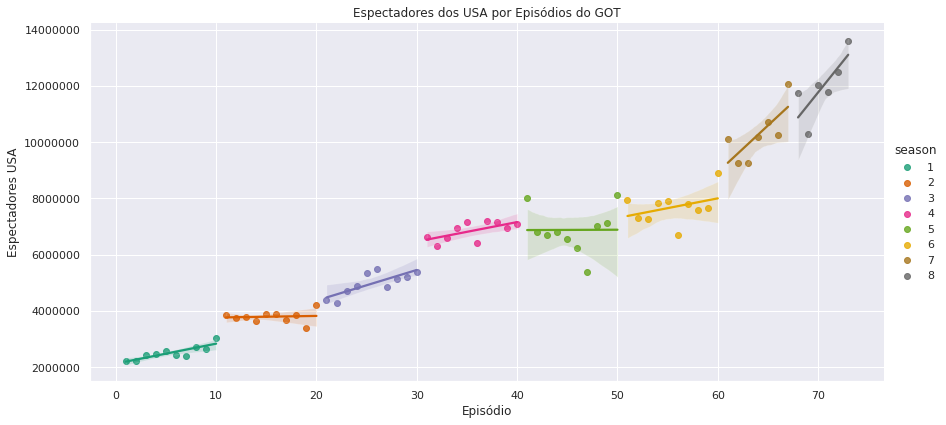

In [138]:
sns.lmplot(x="episode_num_overall", y="us_viewers", hue="season", data=gameOfThrones, height=6, aspect=2,palette='Dark2' )
plt.xlabel("Episódio")
plt.ylabel("Espectadores USA")
plt.title("Espectadores dos USA por Episódios do GOT")
plt.ticklabel_format(style='plain', axis='y');

- Nessa etapa:
  - Criar um grupo com colunas mais relevantes para a visualização dos dados de episódios mais assistidos;
  - Renomear através da função rename()o cabeçalho das colunas de inglês para português. 

In [17]:
episodiosResumido = episodios[['season', 'episode_num_in_season','title', 'us_viewers']]
episodiosResumido.rename(columns = {'season':'Temporada', 'episode_num_in_season':'Episódio',
                              'title':'Título','us_viewers':'Visualizações' }, inplace = True)


- Usando a função .sort_values() classificamos o nosso dataframe por visualizações de forma decrescente.

In [18]:
episodiosResumido.sort_values(by='Visualizações',ascending=False)

,Temporada,Episódio,Título,Visualizações
72,8,6,The Iron Throne,13610000.0
71,8,5,The Bells,12480000.0
66,7,7,The Dragon and the Wolf,12070000.0
69,8,3,The Long Night,12020000.0
70,8,4,The Last of the Starks,11800000.0
...,...,...,...,...
5,1,6,A Golden Crown,2440000.0
2,1,3,Lord Snow,2440000.0
6,1,7,You Win or You Die,2400000.0
0,1,1,Winter Is Coming,2220000.0


- Os dez episódios mais assistidos fazem parte da 7ª ou 8ª temporada do seriado;
- O episódio mais assistido foi o ultimo episódio da série 
  - 8ª episódio da 8ª temporada - "The Iron Throne".

- Para fins de análise vamos criar uma grupo composto pela média de espectadores por temporada.
  - Usaremos o método mean() = Média aritmética dos dados.

In [32]:
mediaEspectadores = gameOfThrones.groupby(['season'])['us_viewers'].mean()

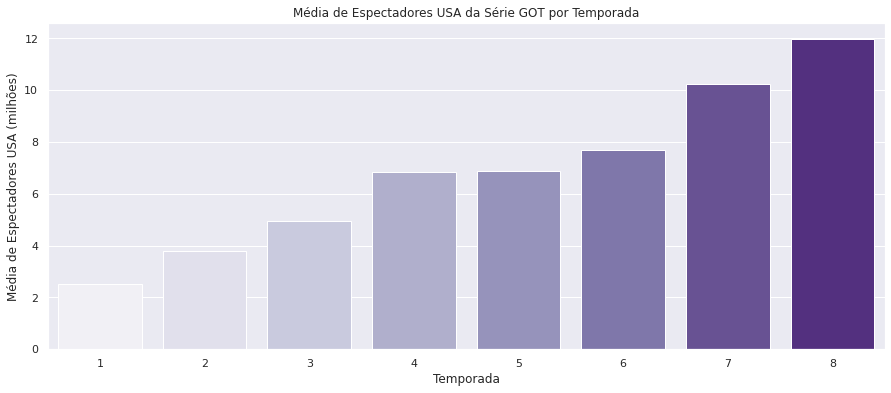

In [109]:
sns.set(style="darkgrid")
plt.figure(figsize=(15, 6))
sns.barplot(x=mediaEspectadores.index, y=(mediaEspectadores.values / 1e6), palette='Purples') 
plt.ylabel('Média de Espectadores USA (milhões)')
plt.xlabel('Temporada')
plt.title('Média de Espectadores USA da Série GOT por Temporada');


- Podemos ver que a audiência cresceu de forma constante ao longo da série. Terminou como o programa mais assistido na história da HBO (só superado recentemente por Euphoria).

###6.1.2. Quais temporadas tiveram as avaliações mais altas no IMDb?###

- O **IMDb** (Internet Move Database) é uma das maiores base de dados online sobre cinema e tudo o que envolve a indústria do entretenimento. Além de reunir informações sobre artistas e produções, o site também permite que usuários criem listas e avaliem seus filmes e **séries** favoritas.
  - Qualquer usuário registrado no Internet Movie Database pode avaliar filmes, séries, documentários, e diversos outros tipos de produções audiovisuais em uma escala de 1 a 10, representada por estrelas. Os votos individuais são agregados e resumidos em uma nota única, exibida com destaque na página principal do título.
  - O IMDb utiliza vários filtros para determinar o “peso” de determinadas avaliações na nota final, com o objetivo de diminuir ou eliminar o impacto de votações em massa combinadas para afetar a classificação de uma obra.

Text(0.5, 1.0, 'Classificação no iMDb por episódios do GOT')

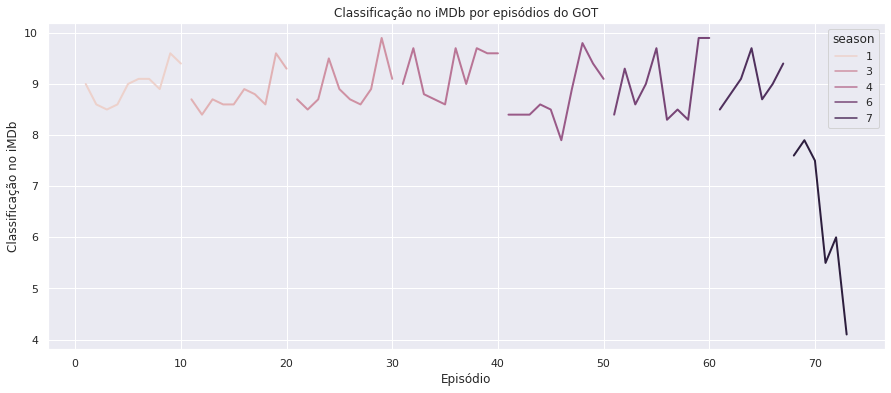

In [143]:
plt.figure(figsize=(15, 6))
sns.lineplot(x="episode_num_overall", y="imdb_rating", hue="season", data=gameOfThrones, linewidth = 2)
plt.xlabel("Episódio")
plt.ylabel("Classificação no iMDb")
plt.title("Classificação no iMDb por episódios do GOT")

- A série teve avaliações incrivelmente altas e consistentes ao longo de suas primeiras sete temporadas. O gráfico indica que os fãs tiveram uma reação negativa muito forte à conclusão da série dando notas extremamente baixas na 8ª temporada.


###6.1.3. Quais episódios receberam mais votos no IMDb?###

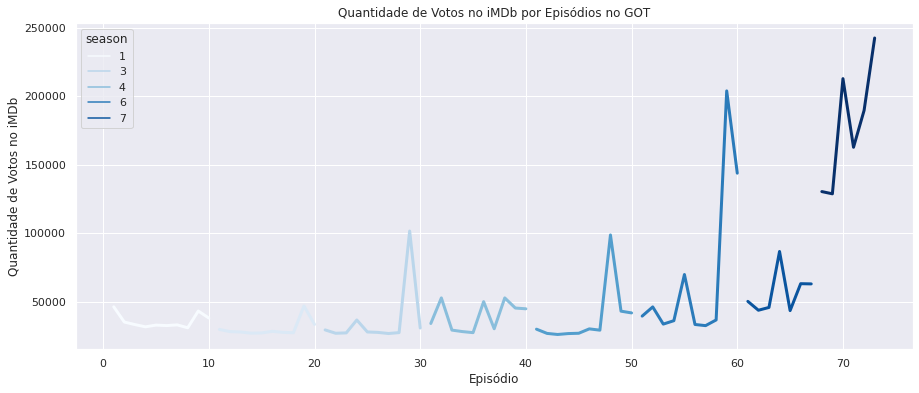

In [141]:
plt.figure(figsize=(15, 6))
sns.lineplot(x="episode_num_overall", y="total_votes", hue="season", data=gameOfThrones, palette='Blues', linewidth = 3)
plt.xlabel("Episódio")
plt.ylabel("Quantidade de Votos no iMDb")
plt.title("Quantidade de Votos no iMDb por Episódios no GOT")
plt.ticklabel_format(style='plain', axis='y');

- Parece que os fãs odiaram tanto a temporada final de Game of Thrones que acessaram e votaram no IMDb em grande número para protestar. Uma vez que, a série estava recebendo cerca de 50.000 votos por episódio, mas os episódios da temporada final obtiveram de 3 a 5 vezes mais votos.

###6.1.4. Quem são os personagens principais de Game of Thrones?###

- A série é composta por um enorme elenco de personagens.
- Vamos utilizar um laço *for* para gerar uma lista com os nomes dos persoagens (personagens_principais) e a contagem de vez que foram mencionadas no resumo/ descrição dos episódios.
- Vamos percorrer as descrições dos episódios para ver quem realmente são os personagens principais com base em quantas vezes cada pessoa é mencionada.

In [173]:
# Normalize descriptons where people go by two names
gameOfThrones['desc'] = gameOfThrones['desc'].str.replace('Eddard', 'Ned')
gameOfThrones['desc'] = gameOfThrones['desc'].str.replace('Sandor Clegane', 'The Hound')

nomePersonagens = ['Ned', 'Robert', 'Jaime', 'Catelyn', 'Cersei', 'Daenerys', 'Jorah', 'Viserys',
                   'Jon', 'Robb', 'Sansa', 'Arya', 'Theon', 'Bran', 'Joffrey', 'The Hound', 'Tyrion',
                   'Drogo', 'Littlefinger', 'Davos', 'Samwell', 'Stannis', 'Melisandre', 'Bronn',
                   'Varys', 'Shae', 'Margaery', 'Tywin', 'Talisa', 'Ygritte', 'Gendry', 'Tormund',
                   'Brienne', 'Ramsay', 'Gilly', 'Daario', 'Missandei', 'Tommen', 'Ellaria', 'Jaqen',
                   'High Sparrow', 'Grey Worm', 'Hodor']

for nomePersonagem in nomePersonagem:
    gameOfThrones[nomePersonagem] = np.where(gameOfThrones['desc'].str.contains(nomePersonagem), 1, 0)
    
gameOfThrones.head()

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date_x,us_viewers,original_air_date_y,imdb_rating,...,Tommen,Ellaria,Jaqen,High Sparrow,Grey Worm,Hodor,H,o,d,r
0,1,1,1,Winter Is Coming,Tim Van Patten,David Benioff & D. B. Weiss,2011-04-17,2220000.0,17 Apr. 2011,9.0,...,0,0,0,0,0,0,0,1,1,1
1,1,2,2,The Kingsroad,Tim Van Patten,David Benioff & D. B. Weiss,2011-04-24,2200000.0,24 Apr. 2011,8.6,...,0,0,0,0,0,0,0,1,1,1
2,1,3,3,Lord Snow,Brian Kirk,David Benioff & D. B. Weiss,2011-05-01,2440000.0,1 May 2011,8.5,...,0,0,0,0,0,0,0,1,1,1
3,1,4,4,"Cripples, Bastards, and Broken Things",Brian Kirk,Bryan Cogman,2011-05-08,2450000.0,8 May 2011,8.6,...,0,0,0,0,0,0,0,1,1,1
4,1,5,5,The Wolf and the Lion,Brian Kirk,David Benioff & D. B. Weiss,2011-05-15,2580000.0,15 May 2011,9.0,...,0,0,0,0,0,0,0,1,1,1


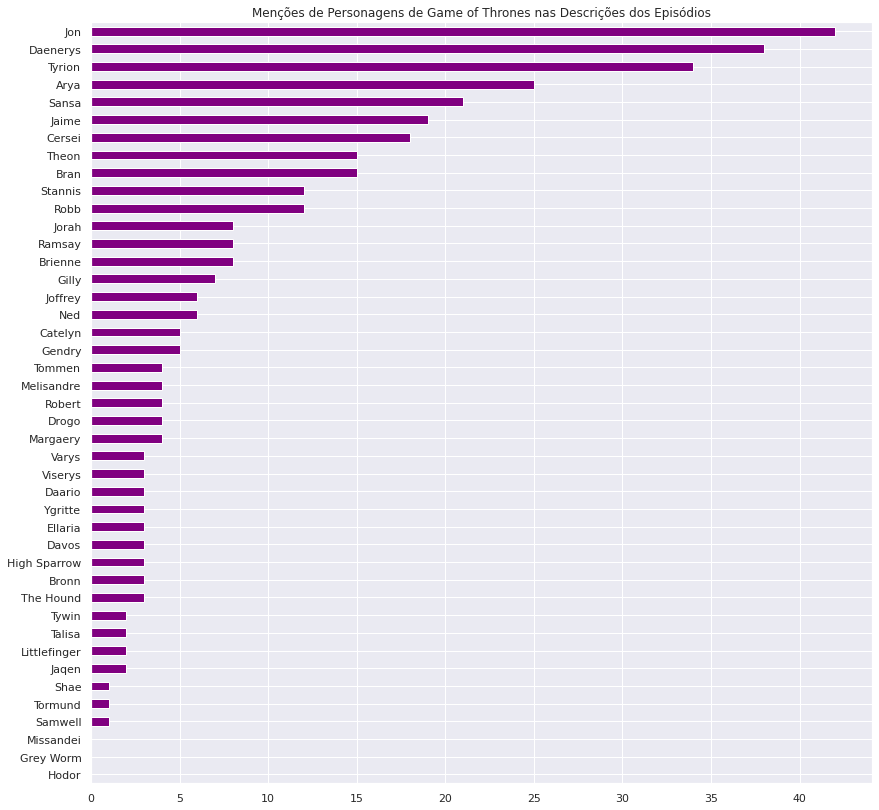

In [182]:
personagensDestaques = gameOfThrones[nomePersonagens].sum().sort_values()
personagensDestaques.plot.barh(figsize=(14, 14),title='Menções de Personagens de Game of Thrones nas Descrições dos Episódios', color='purple');

- Com base nas menções nas descrições dos episódios, Jon Snow, Daenerys e Tyrion são os personagens principais de Game of Thrones, seguidos por Arya e Sansa Stark e Jaime e Cersei Lannister. Observe que os personagens mais próximos do topo desta lista são aqueles que foram apresentados no início do programa e também sobreviveram até (quase) o final.

- Vamos analisar os personagens principais ao longo das temporadas.

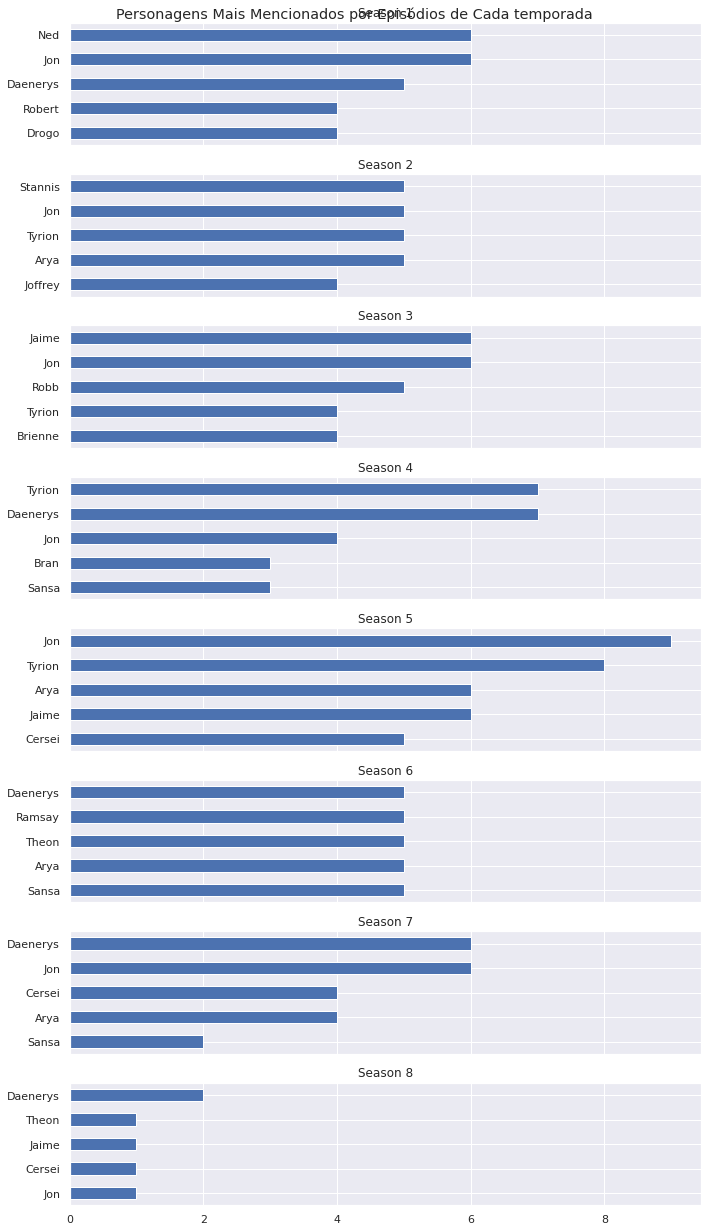

In [193]:
fig, axes = plt.subplots(8, 1, figsize=(10, 18), sharex=True)

for s in range(1, 9):
    gb = gameOfThrones[['season'] + nomePersonagens].groupby('season').sum()
    destaquesTemporadas = gb.T[s].sort_values().tail(5) # top 5 characters in each season
    destaquesTemporadas.plot.barh(ax=axes[s-1], title='Season ' + str(s))
    
    fig.suptitle("Personagens Mais Mencionados por Episódios de Cada temporada")
    fig.tight_layout(rect=[0, 0.03, 1.0, 0.99]);

- Como esperado, à medida que os personagens morrem nas temporadas anteriores, seus nomes param de aparecer nas descrições dos episódios. Outros personagens ganham destaque à medida que mais episódios se concentram neles. Destacam-se na série como um todo aqueles personagens que sobreviveram até o final.